## House price prediction test

##### Goal - Prediction of house price 

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing

##### loading the train and test data

In [2]:
train=pd.read_csv('train.csv',encoding='utf-8')
train.head()

,id,county,city,zipcode,address,state,latitude,longitude,cemetery_dist_miles,nationalhighway_miles,...,yearbuilt,pool,fireplace,patio,lotsize,Census_MedianIncome,Unemployment,EmploymentDiversity,Crime_Rate,rent
0,train_0,NaN,WEXFORD,NaN,266 Clematis Dr Allegheny County,PA,40.618200,-80.077600,1.019586,0.206222,...,2008,0,1,0,4086.388045,54476.09,5.1,3.48,2.4,2400
1,train_1,NaN,WHITEHALL,NaN,2310 N 1st Ave Lehigh County,PA,40.649906,-75.478940,1.019586,0.206222,...,1935,0,0,0,2247.513425,54476.09,5.1,3.48,2.4,995
2,train_2,NaN,WHITEHALL,NaN,3338 St Stephens Ln Lehigh County,PA,40.646282,-75.510056,1.019586,0.206222,...,2006,0,1,1,3109.741302,54476.09,5.1,3.48,2.4,1740
3,train_3,NaN,WAYNESBORO,NaN,97 W Main St Franklin County,PA,39.756992,-77.579704,1.019586,0.206222,...,1960,0,0,0,2349.673126,54476.09,5.1,3.48,2.4,675
4,train_4,NaN,QUAKERTOWN,NaN,200 E Broad St Bucks County,PA,40.441177,-75.332540,1.019586,0.206222,...,1960,0,0,0,2043.194023,54476.09,5.1,3.48,2.4,1300


In [3]:
train.shape

(24269, 35)

In [4]:
test=pd.read_csv('test.csv',encoding='utf-8')
train.head()

,id,county,city,zipcode,address,state,latitude,longitude,cemetery_dist_miles,nationalhighway_miles,...,yearbuilt,pool,fireplace,patio,lotsize,Census_MedianIncome,Unemployment,EmploymentDiversity,Crime_Rate,rent
0,train_0,NaN,WEXFORD,NaN,266 Clematis Dr Allegheny County,PA,40.618200,-80.077600,1.019586,0.206222,...,2008,0,1,0,4086.388045,54476.09,5.1,3.48,2.4,2400
1,train_1,NaN,WHITEHALL,NaN,2310 N 1st Ave Lehigh County,PA,40.649906,-75.478940,1.019586,0.206222,...,1935,0,0,0,2247.513425,54476.09,5.1,3.48,2.4,995
2,train_2,NaN,WHITEHALL,NaN,3338 St Stephens Ln Lehigh County,PA,40.646282,-75.510056,1.019586,0.206222,...,2006,0,1,1,3109.741302,54476.09,5.1,3.48,2.4,1740
3,train_3,NaN,WAYNESBORO,NaN,97 W Main St Franklin County,PA,39.756992,-77.579704,1.019586,0.206222,...,1960,0,0,0,2349.673126,54476.09,5.1,3.48,2.4,675
4,train_4,NaN,QUAKERTOWN,NaN,200 E Broad St Bucks County,PA,40.441177,-75.332540,1.019586,0.206222,...,1960,0,0,0,2043.194023,54476.09,5.1,3.48,2.4,1300


In [5]:
test.shape

(6066, 35)

##### As we will be working on training data, we perform EDA on training set , build model on top of it and predict using test data

## EDA on Training set

### Step-1 : Detecting Null rows for all of the columns

In [6]:
train.isna().sum()

id                          0
county                     34
city                        0
zipcode                    34
address                   952
state                       0
latitude                    0
longitude                   0
cemetery_dist_miles         0
nationalhighway_miles       0
railline_miles              0
starbucks_miles             0
walmart_miles               0
hospital_miles              0
physician_dist_miles        0
dentist_dist_miles          0
opt_dist_miles              0
vet_dist_miles              0
farmers_miles               0
bed                         0
bath                        0
halfbath                    0
sqft                        0
property_type            3626
garage                      0
yearbuilt                   0
pool                        0
fireplace                   0
patio                       0
lotsize                     0
Census_MedianIncome         0
Unemployment                0
EmploymentDiversity         0
Crime_Rate

##### Observation : It is observed that few columns (Country, zipcode,address and property_type) have null values. Let's check the percentage of null values for this columns (We can omit this columns if null values are over 70%).

In [7]:
train.isnull().mean() * 100

id                        0.000000
county                    0.140096
city                      0.000000
zipcode                   0.140096
address                   3.922700
state                     0.000000
latitude                  0.000000
longitude                 0.000000
cemetery_dist_miles       0.000000
nationalhighway_miles     0.000000
railline_miles            0.000000
starbucks_miles           0.000000
walmart_miles             0.000000
hospital_miles            0.000000
physician_dist_miles      0.000000
dentist_dist_miles        0.000000
opt_dist_miles            0.000000
vet_dist_miles            0.000000
farmers_miles             0.000000
bed                       0.000000
bath                      0.000000
halfbath                  0.000000
sqft                      0.000000
property_type            14.940871
garage                    0.000000
yearbuilt                 0.000000
pool                      0.000000
fireplace                 0.000000
patio               

In [8]:
train[['county','zipcode','address','property_type']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24269 entries, 0 to 24268
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   county         24235 non-null  object 
 1   zipcode        24235 non-null  float64
 2   address        23317 non-null  object 
 3   property_type  20643 non-null  object 
dtypes: float64(1), object(3)
memory usage: 758.5+ KB


##### As observed, we noticed that country, address and property_type (which has nulls) are of type object(string) and those columns can be replaced with mode as they are categorical (this is effective way of dealing with NaN's of categorical nature)

In [9]:
train=train.fillna(train.mode().iloc[0])
train.head()

,id,county,city,zipcode,address,state,latitude,longitude,cemetery_dist_miles,nationalhighway_miles,...,yearbuilt,pool,fireplace,patio,lotsize,Census_MedianIncome,Unemployment,EmploymentDiversity,Crime_Rate,rent
0,train_0,PHILADELPHIA,WEXFORD,19121.0,266 Clematis Dr Allegheny County,PA,40.618200,-80.077600,1.019586,0.206222,...,2008,0,1,0,4086.388045,54476.09,5.1,3.48,2.4,2400
1,train_1,PHILADELPHIA,WHITEHALL,19121.0,2310 N 1st Ave Lehigh County,PA,40.649906,-75.478940,1.019586,0.206222,...,1935,0,0,0,2247.513425,54476.09,5.1,3.48,2.4,995
2,train_2,PHILADELPHIA,WHITEHALL,19121.0,3338 St Stephens Ln Lehigh County,PA,40.646282,-75.510056,1.019586,0.206222,...,2006,0,1,1,3109.741302,54476.09,5.1,3.48,2.4,1740
3,train_3,PHILADELPHIA,WAYNESBORO,19121.0,97 W Main St Franklin County,PA,39.756992,-77.579704,1.019586,0.206222,...,1960,0,0,0,2349.673126,54476.09,5.1,3.48,2.4,675
4,train_4,PHILADELPHIA,QUAKERTOWN,19121.0,200 E Broad St Bucks County,PA,40.441177,-75.332540,1.019586,0.206222,...,1960,0,0,0,2043.194023,54476.09,5.1,3.48,2.4,1300


In [10]:
# Checking for percentage of nulls again
train.isnull().mean()*100

id                       0.0
county                   0.0
city                     0.0
zipcode                  0.0
address                  0.0
state                    0.0
latitude                 0.0
longitude                0.0
cemetery_dist_miles      0.0
nationalhighway_miles    0.0
railline_miles           0.0
starbucks_miles          0.0
walmart_miles            0.0
hospital_miles           0.0
physician_dist_miles     0.0
dentist_dist_miles       0.0
opt_dist_miles           0.0
vet_dist_miles           0.0
farmers_miles            0.0
bed                      0.0
bath                     0.0
halfbath                 0.0
sqft                     0.0
property_type            0.0
garage                   0.0
yearbuilt                0.0
pool                     0.0
fireplace                0.0
patio                    0.0
lotsize                  0.0
Census_MedianIncome      0.0
Unemployment             0.0
EmploymentDiversity      0.0
Crime_Rate               0.0
rent          

##### Observation : All the un-identified values are handled with imputation

### Step-2 : High level stats for all of the columns

In [11]:
train.describe()

,zipcode,latitude,longitude,cemetery_dist_miles,nationalhighway_miles,railline_miles,starbucks_miles,walmart_miles,hospital_miles,physician_dist_miles,...,yearbuilt,pool,fireplace,patio,lotsize,Census_MedianIncome,Unemployment,EmploymentDiversity,Crime_Rate,rent
count,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,...,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000,24269.000000
mean,18032.371832,40.080788,-77.241598,1.206987,0.290908,1.049048,2.042534,3.528326,2.269302,0.352973,...,1958.995014,0.011455,0.206972,0.197948,3669.835108,57016.945681,5.187826,3.438248,6.394034,1599.895505
std,1477.099069,1.637096,5.817313,0.927508,0.364962,1.574878,3.205261,1.794201,2.467797,0.551741,...,23.278187,0.106415,0.405144,0.398461,3185.150540,23918.805643,0.956070,0.150563,7.345398,916.256058
min,15001.000000,-12.116930,-149.900278,0.022214,0.000027,0.000248,0.013197,0.118545,0.041096,0.000087,...,1800.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.970000,2.350000,0.000000,385.000000
25%,17111.000000,39.966766,-77.008588,0.818566,0.143624,0.465909,0.959076,2.712467,1.160151,0.170974,...,1960.000000,0.000000,0.000000,0.000000,1712.000000,40817.450000,4.500000,3.370000,1.468825,1000.000000
50%,18944.000000,40.130169,-75.475763,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,...,1960.000000,0.000000,0.000000,0.000000,2872.730796,54476.090000,5.100000,3.480000,2.400000,1400.000000
75%,19128.000000,40.444389,-75.185042,1.227709,0.281964,0.860038,1.789913,3.870699,2.196950,0.299176,...,1960.000000,0.000000,0.000000,0.000000,4266.189119,70379.790000,6.000000,3.540000,9.136104,1895.000000
max,19611.000000,61.218056,-11.706829,9.747778,7.920969,28.306430,63.618152,26.409748,32.433629,14.301216,...,2016.000000,1.000000,1.000000,1.000000,19341.000000,198425.570000,10.000000,3.670000,39.159639,16000.000000


##### Let's observe the values at 99th percentile and 100th percentile to sense any outliers 

##### Plotting 100th percentile

In [12]:
print('100th Percentile')
train[['cemetery_dist_miles', 'nationalhighway_miles','railline_miles','starbucks_miles','walmart_miles','hospital_miles','physician_dist_miles','dentist_dist_miles','opt_dist_miles','vet_dist_miles','farmers_miles','bed','bath','halfbath','sqft','garage','yearbuilt','pool','fireplace','patio','lotsize','Census_MedianIncome','Unemployment','EmploymentDiversity','Crime_Rate']].quantile(1.0)

100th Percentile


cemetery_dist_miles           9.747778
nationalhighway_miles         7.920969
railline_miles               28.306430
starbucks_miles              63.618152
walmart_miles                26.409748
hospital_miles               32.433629
physician_dist_miles         14.301216
dentist_dist_miles           19.823016
opt_dist_miles               22.761643
vet_dist_miles              141.184122
farmers_miles                35.603985
bed                          18.000000
bath                         12.000000
halfbath                     12.000000
sqft                       5000.000000
garage                        1.000000
yearbuilt                  2016.000000
pool                          1.000000
fireplace                     1.000000
patio                         1.000000
lotsize                   19341.000000
Census_MedianIncome      198425.570000
Unemployment                 10.000000
EmploymentDiversity           3.670000
Crime_Rate                   39.159639
Name: 1.0, dtype: float64

##### Plotting 99th Percentile

In [13]:
print('99th Percentile')
train[['cemetery_dist_miles', 'nationalhighway_miles','railline_miles','starbucks_miles','walmart_miles','hospital_miles','physician_dist_miles','dentist_dist_miles','opt_dist_miles','vet_dist_miles','farmers_miles','bed','bath','halfbath','sqft','garage','yearbuilt','pool','fireplace','patio','lotsize','Census_MedianIncome','Unemployment','EmploymentDiversity','Crime_Rate']].quantile(0.99)

99th Percentile


cemetery_dist_miles           5.166143
nationalhighway_miles         1.912450
railline_miles                8.401305
starbucks_miles              13.762874
walmart_miles                10.859408
hospital_miles               13.671966
physician_dist_miles          3.115779
dentist_dist_miles            5.514105
opt_dist_miles                6.008452
vet_dist_miles               95.196117
farmers_miles                11.300060
bed                           8.000000
bath                          4.000000
halfbath                      2.000000
sqft                       4500.000000
garage                        1.000000
yearbuilt                  2015.000000
pool                          1.000000
fireplace                     1.000000
patio                         1.000000
lotsize                   16204.000000
Census_MedianIncome      116944.460000
Unemployment                  7.330000
EmploymentDiversity           3.640000
Crime_Rate                   21.328510
Name: 0.99, dtype: float6

##### Observation : except the columns garage, yearbuilt, pool, fireplace and patio .All the the other columns has much more values at 100th percentile. But we cannot consider them as outliers as they follows meaningful measure

## 1. Exploratory Data Analysis

##### distribution of target variable - rent

Text(0.5, 1.0, 'Rent amount Distribution')

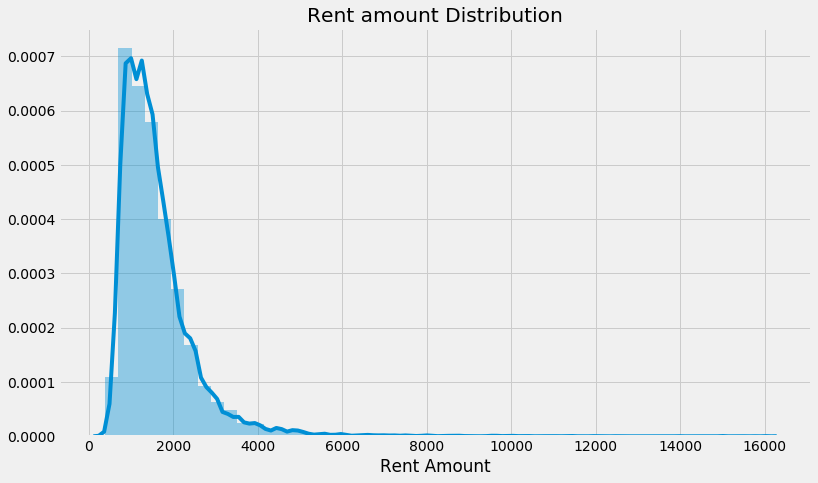

In [14]:
# Plotting a dist plot of target variable
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.rent)
plt.xlabel("Rent Amount")
plt.title("Rent amount Distribution")

In [15]:
train.rent.mean()

1599.8955045531336

##### As observed above, the rent amount has mean at 1600 and it is positively skewed

##### Distribution of variable - county

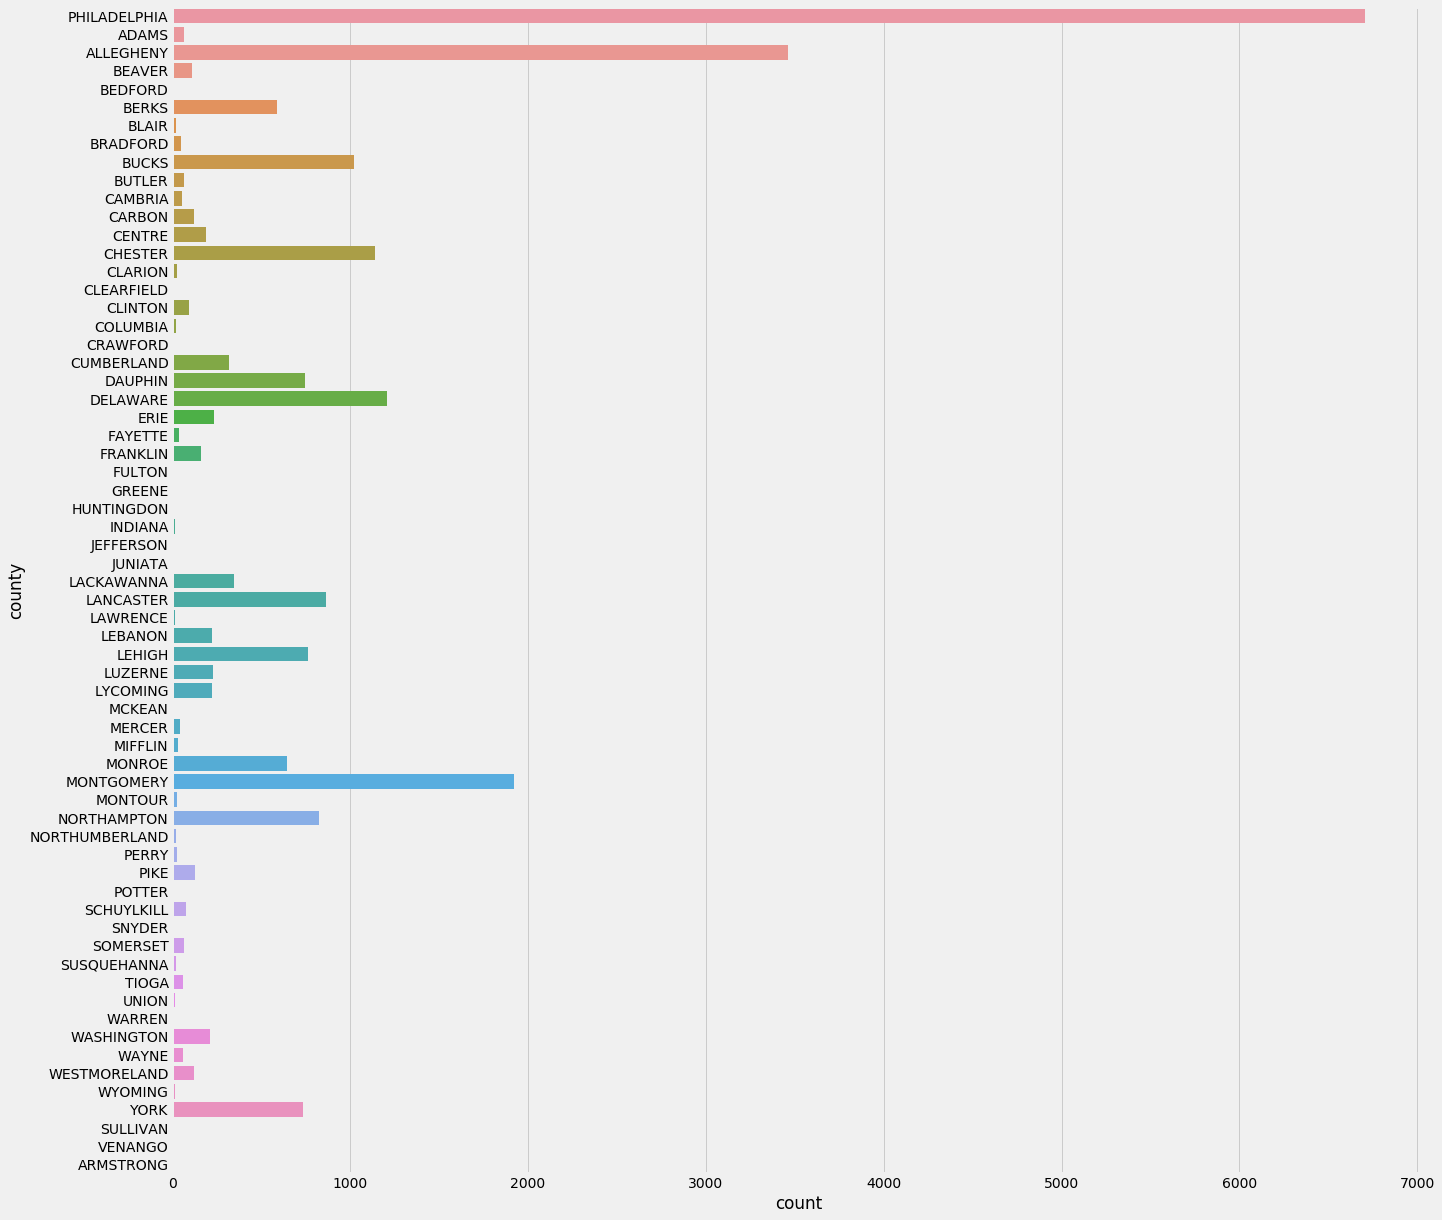

In [16]:
plt.figure(figsize=(20,20))
sns.countplot(y=train.county,data=train)

##### Distribution of variable - property_type

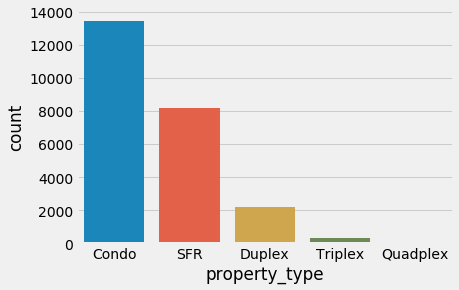

In [17]:
# plt.figure(figsize=(10,10))
sns.countplot(train.property_type)

##### Distribution of variable - City 

In [18]:
x=train[['city']].value_counts().reset_index(name='frequency')
# x=x.loc[x['frequency']> 100]
x.head(30)

,city,frequency
0,PHILADELPHIA,6674
1,PITTSBURGH,2789
2,HARRISBURG,573
3,YORK,453
4,ALLENTOWN,389
5,LANCASTER,380
6,BETHLEHEM,359
7,READING,359
8,EASTON,280
9,NORRISTOWN,279


##### Observation : Philadelphia , pittsburg , harrisburg,york and allentown are the top-5 cities as per the distribution

##### Correlation between Numerical Predictors and Target variable

In [19]:
corr = train.corr()

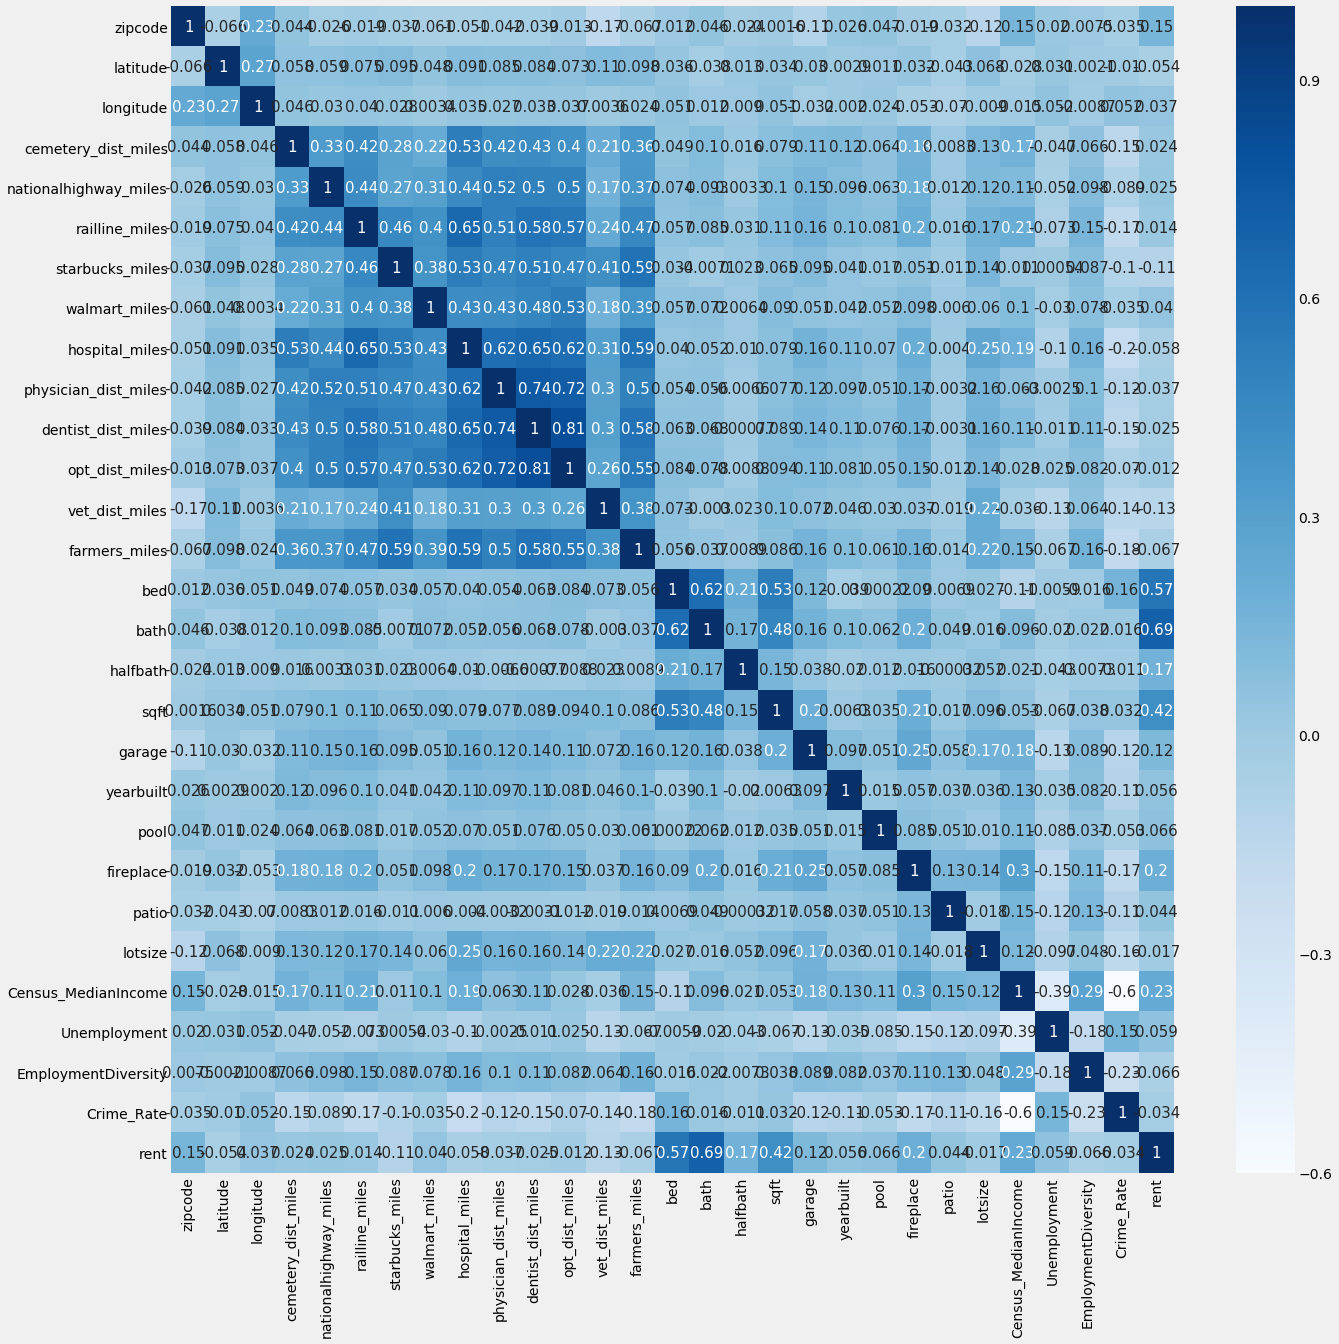

In [20]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cmap='Blues', annot=True,annot_kws={'size': 15})

##### Observation: there is over 60% correlation between medical clinic centers, which is evident that they might be located near to each other

##### Bi-variate analysis - mean price for categorical variables
The categorical variables we have are :         1)county               2)property_type

In [21]:
# Aggregating rent amount with mean as per county
pivot_county=train.pivot_table(index='county',values='rent',aggfunc=np.mean)
pivot_county

,rent
county,
ADAMS,1270.362319
ALLEGHENY,1514.385260
ARMSTRONG,1350.000000
BEAVER,1208.220183
BEDFORD,784.444444
...,...
WASHINGTON,1502.919048
WAYNE,1017.322034
WESTMORELAND,1009.564516


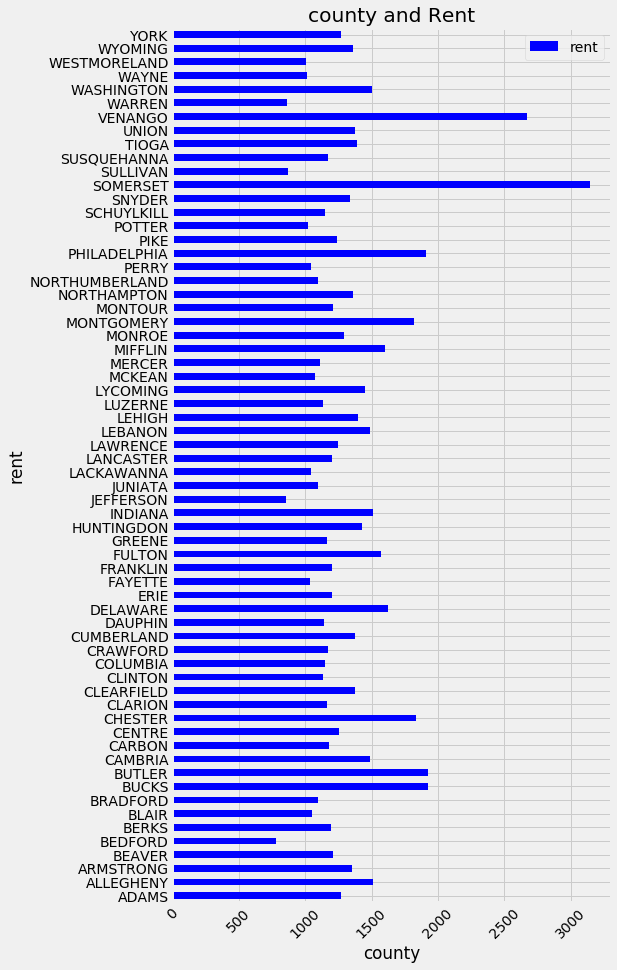

In [22]:
pivot_county.plot.barh(color='blue',figsize=(7,15))
plt.xlabel("county")
plt.ylabel("rent")
plt.title("county and Rent")
plt.xticks(rotation=45)
plt.show()

In [23]:
# Aggregating rent amount with mean as per property_type
pivot_ptype=train.pivot_table(index='property_type',values='rent',aggfunc=np.mean)
pivot_ptype

,rent
property_type,
Condo,1437.076803
Duplex,2120.939162
Quadplex,5442.222222
SFR,1576.586911
Triplex,4045.881818


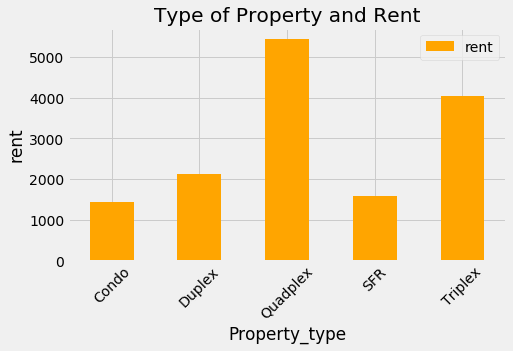

In [24]:
pivot_ptype.plot(kind='bar',color='orange',figsize=(7,4))
plt.xlabel("Property_type")
plt.ylabel("rent")
plt.title("Type of Property and Rent")
plt.xticks(rotation=45)
plt.show()

In [25]:
# Also, let's check the mean price by year (create 10-year bins from 1800 to 2016)
train['year_bins'] = pd.cut(x=train['yearbuilt'], bins=[1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2016])
train[['year_bins']].head()

,year_bins
0,"(2000, 2010]"
1,"(1930, 1940]"
2,"(2000, 2010]"
3,"(1950, 1960]"
4,"(1950, 1960]"


##### now, aggregating mean of price by year bins

In [26]:
# Aggregating rent amount with mean as per year intervals
pivot_year=train.pivot_table(index='year_bins',values='rent',aggfunc=np.mean)
pivot_year

,rent
year_bins,
"(1800, 1810]",1951.666667
"(1810, 1820]",1610.000000
"(1820, 1830]",2423.750000
"(1830, 1840]",2245.750000
"(1840, 1850]",1927.777778
"(1850, 1860]",2094.840909
"(1860, 1870]",2051.842105
"(1870, 1880]",1865.346154
"(1880, 1890]",1558.827957


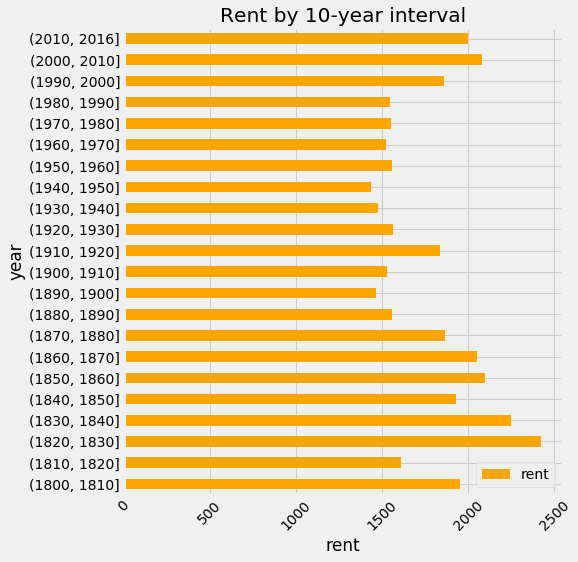

In [27]:
pivot_year.plot.barh(color='orange',figsize=(7,8))
plt.xlabel("rent")
plt.ylabel("year")
plt.title("Rent by 10-year interval")
plt.xticks(rotation=45)
plt.show()

In [28]:
# Aggregating rent amount with mean as per city
pivot_city=train.pivot_table(index='city',values='rent',aggfunc=np.mean)
pivot_city = pivot_city.sort_values(('rent'), ascending=False)
pivot_city

,rent
city,
MILLERTON,8000.000000
GLADWYNE,4313.269231
VILLANOVA,3914.375000
ARISTES,3800.000000
SOMERSET,3570.600000
...,...
VANDERGRIFT,550.000000
NEW EAGLE,550.000000
LARIMER,535.000000


##### as we have 717 unique values, which cant be displayed in normal chart, we will consider first 20 cities and plot accordingly

In [29]:
pivot_city=pivot_city.head(20)


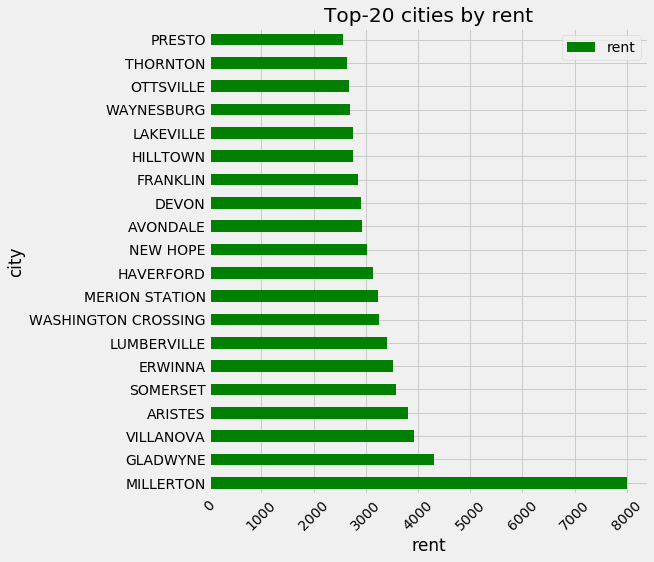

In [30]:
pivot_city.plot.barh(color='green',figsize=(7,8))
plt.xlabel("rent")
plt.ylabel("city")
plt.title("Top-20 cities by rent")
plt.xticks(rotation=45)
plt.show()

##### Observations :
    1) the mean of rent is more between year range of 1820-1830 
    2) rent is more in Quadplex and triplex property type , although their count is relatively much lower
    3) somerset and venango county's have relatively more rent than other county's
    4) Millerton is the city with largest average rent

## Step-2 : Converting categorial data to numeric and dropping un necessary columns

columns which are irrevalent and to be dropped : zipcode, address, state

In [31]:
train=train.drop(['zipcode','address','state'],axis=1)
test=test.drop(['zipcode','address','state'],axis=1)

In [32]:
train=pd.get_dummies(train)
train.head()

,latitude,longitude,cemetery_dist_miles,nationalhighway_miles,railline_miles,starbucks_miles,walmart_miles,hospital_miles,physician_dist_miles,dentist_dist_miles,...,"year_bins_(1920, 1930]","year_bins_(1930, 1940]","year_bins_(1940, 1950]","year_bins_(1950, 1960]","year_bins_(1960, 1970]","year_bins_(1970, 1980]","year_bins_(1980, 1990]","year_bins_(1990, 2000]","year_bins_(2000, 2010]","year_bins_(2010, 2016]"
0,40.618200,-80.077600,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,0.472933,...,0,0,0,0,0,0,0,0,1,0
1,40.649906,-75.478940,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,0.472933,...,0,1,0,0,0,0,0,0,0,0
2,40.646282,-75.510056,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,0.472933,...,0,0,0,0,0,0,0,0,1,0
3,39.756992,-77.579704,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,0.472933,...,0,0,0,1,0,0,0,0,0,0
4,40.441177,-75.332540,1.019586,0.206222,0.629888,1.348776,3.326397,1.584675,0.229126,0.472933,...,0,0,0,1,0,0,0,0,0,0


In [33]:
# normalizing the data
import pandas as pd
from sklearn import preprocessing

normalized_df=(train-train.min())/(train.max()-train.min())

In [34]:
normalized_df.head()

,latitude,longitude,cemetery_dist_miles,nationalhighway_miles,railline_miles,starbucks_miles,walmart_miles,hospital_miles,physician_dist_miles,dentist_dist_miles,...,"year_bins_(1920, 1930]","year_bins_(1930, 1940]","year_bins_(1940, 1950]","year_bins_(1950, 1960]","year_bins_(1960, 1970]","year_bins_(1970, 1980]","year_bins_(1980, 1990]","year_bins_(1990, 2000]","year_bins_(2000, 2010]","year_bins_(2010, 2016]"
0,0.719099,0.505253,0.102552,0.026032,0.022244,0.020998,0.122012,0.047652,0.016015,0.02385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.719532,0.538530,0.102552,0.026032,0.022244,0.020998,0.122012,0.047652,0.016015,0.02385,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.719482,0.538305,0.102552,0.026032,0.022244,0.020998,0.122012,0.047652,0.016015,0.02385,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.707356,0.523329,0.102552,0.026032,0.022244,0.020998,0.122012,0.047652,0.016015,0.02385,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.716685,0.539590,0.102552,0.026032,0.022244,0.020998,0.122012,0.047652,0.016015,0.02385,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step-3 : Data Modelling (Type - Regression)

##### Metric to be used : 1) RMSE (Root Mean square Error)
##### Algorithmsto be used : Linear regression , Decision Trees , random forest , XGBoost

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [36]:
X=normalized_df.drop(['rent'],axis=1)
y=normalized_df['rent']

In [37]:
# splitting train and test set
# splitting train and test set
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

##### Random Forest Regreesor Model

In [38]:
#model
%time
rf_regressor = RandomForestRegressor(n_jobs=-1,random_state=42)
rf_regressor.fit(X_train, y_train)

Wall time: 0 ns


RandomForestRegressor(n_jobs=-1, random_state=42)

In [39]:
#model
%time
lr_regressor=LinearRegression(n_jobs=-1)
lr_regressor.fit(X_train, y_train)

Wall time: 0 ns


LinAlgError: SVD did not converge in Linear Least Squares